In [1]:
import numpy as np
import matplotlib.pyplot as plt

m = 30
theta0_true = 2
theta1_true = 0.5
X = np.linspace(-1,1,m) # [-1, 1] range, divided into m (= 30) points

rand_noise_mu = 0
rand_noise_std = 0.1

rand_noise = np.random.normal(rand_noise_mu, rand_noise_std, m) # m-sized array of random noise
Y = theta0_true + theta1_true * X + rand_noise  # function is Y = mx + c, where m = 0.5, c = 2 + rand_noise

In [2]:
from sklearn import linear_model
X = np.reshape(X, (-1, 1))  # effectively transposes X

regr = linear_model.LinearRegression()  # least squares regression; this is line of best fit
regr.fit(X, Y)  # create a line that best fits Y against X



LinearRegression()

In [3]:
theta0 = regr.intercept_  # intercept attribute of LinearRegression() gives the intercept (lol)
theta1 = regr.coef_ # gives an array of possibilities for gradient
print('theta1: \n', theta0)
print('theta0: \n', theta1)

theta1: 
 2.013189867066775
theta0: 
 [0.50506197]


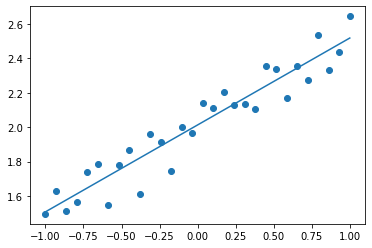

In [4]:
plt.scatter(X, Y) # plot the (pre-calculated) points Y against X
plt.plot(X, theta0 + theta1*X) # plot the (calculated) points Y = theta0 + theta1*X against X
plt.show()

#  Linear Regression for Boston House Price Prediction
(based on example: https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155)

In [5]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  # pandas is a useful data analysis toolbox
import seaborn as sns  # seaborn is a good data visualisation toolbox, which can be found at https://seaborn.pydata.org/

%matplotlib inline

In [6]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

# boston_dataset is a dictionary
# let's check what it contains
boston_dataset.keys()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [8]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()
#boston.tail()
#boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
boston['MEDV'] = boston_dataset.target  # target is regression target

In [9]:
# check for missing values in all the columns
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


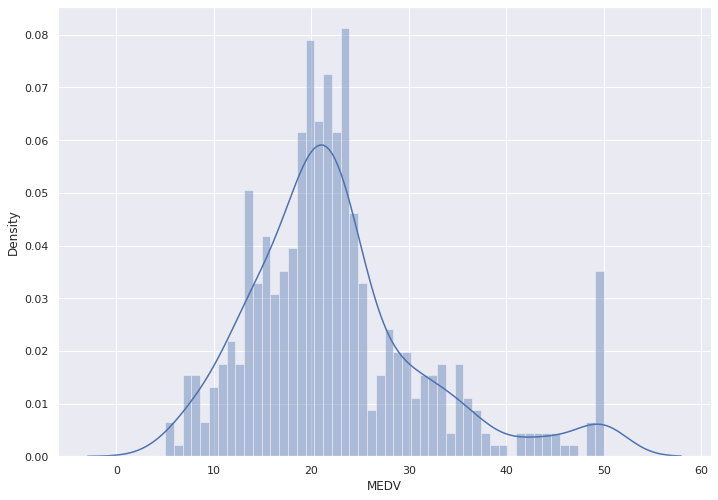

In [10]:
# set the size of the figure
sns.set(rc={'figure.figsize':(11.7,8.27)})

# plot a histogram showing the distribution of the target values
sns.distplot(boston['MEDV'], bins=50) # observed data is boston's regression target; create 50 bins based on the data
plt.show()

In [11]:
# compute the pair wise correlation for all columns  
correlation_matrix = boston.corr().round(2) # round the numbers in the correlation matrix to 2 dp

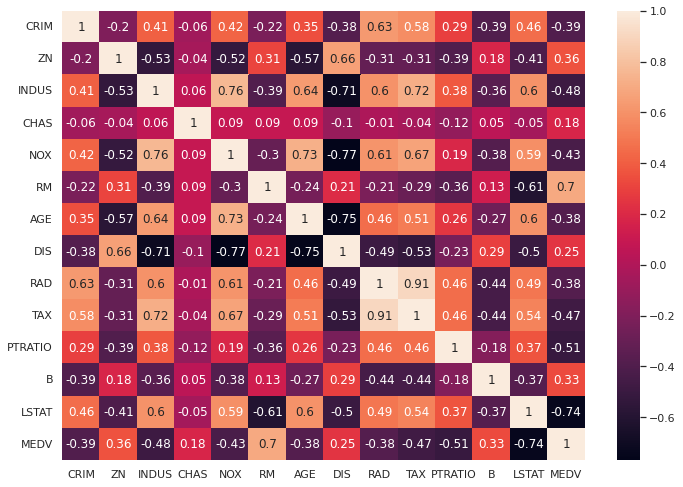

In [12]:
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

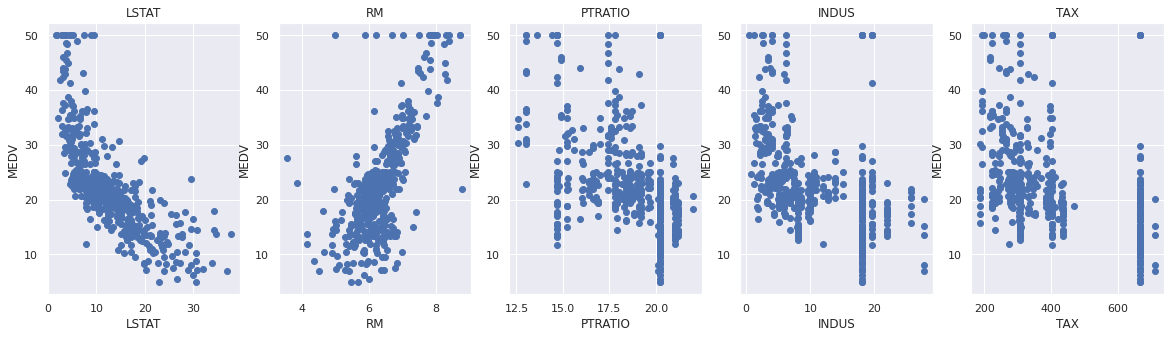

In [13]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1) # create a diagram where plots are distributed along 1 row and (5) columns; fill them starting from column 1
    x = boston[col] # get the LSTAT, RM, ... data
    y = target 
    plt.scatter(x, y, marker='o') # plot the data in a circle dot
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [15]:
#X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])

X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM'], boston['PTRATIO'], boston['INDUS'], boston['TAX']
                      ], columns = ['LSTAT','RM','PTRATIO', 'INDUS', 'TAX'])
# numpy.c_ stacks a 1D array into 2D by placing them in columns (eg LSTAT = [x, y, z, ..] then gets transposed into an LSTAT column)
Y = boston['MEDV']


In [16]:
print(X)

     LSTAT     RM  PTRATIO  INDUS    TAX
0     4.98  6.575     15.3   2.31  296.0
1     9.14  6.421     17.8   7.07  242.0
2     4.03  7.185     17.8   7.07  242.0
3     2.94  6.998     18.7   2.18  222.0
4     5.33  7.147     18.7   2.18  222.0
..     ...    ...      ...    ...    ...
501   9.67  6.593     21.0  11.93  273.0
502   9.08  6.120     21.0  11.93  273.0
503   5.64  6.976     21.0  11.93  273.0
504   6.48  6.794     21.0  11.93  273.0
505   7.88  6.030     21.0  11.93  273.0

[506 rows x 5 columns]


In [17]:

from sklearn.model_selection import train_test_split

# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 5)
(102, 5)
(404,)
(102,)


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # just does z = (x-u)/s, where u is mean and s is standard deviation

scaler.fit(X_train) # calculate u and s based on the data given from the training set
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train) # standardise X_train using u and s from X_train
X_test = scaler.transform(X_test)   # standadise X_test using u and s from X_train

In [19]:
np.mean(X_train, axis=0)  # calculate mean of X_train along the columns of the matrix (ie lstat, rm, ...)

array([-7.07629774e-16, -7.21919774e-16,  2.06567436e-14,  2.35455220e-15,
        4.96027861e-17])

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train) # fit the linear regression to X, Y training values

LinearRegression()

In [21]:
# model evaluation for training set

y_train_predict = lin_model.predict(X_train)  # given the training inputs, predict the Y values
mse = (mean_squared_error(Y_train, y_train_predict))  # calculate the mse


print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print("\n")

# model evaluation for testing set

y_test_predict = lin_model.predict(X_test)  # given the testing input, predict the corresponding Y values

mse = (mean_squared_error(Y_test, y_test_predict))  # again calculate mse



print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))


The model performance for training set
--------------------------------------
MSE is 28.07202600757083


The model performance for testing set
--------------------------------------
MSE is 23.84960738031438


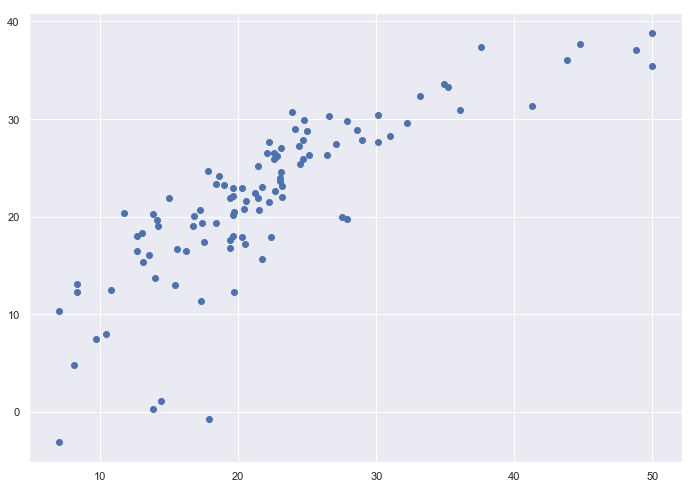

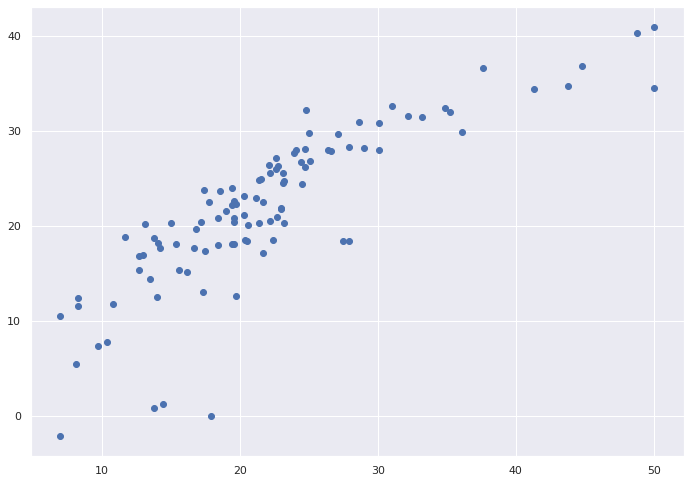

In [22]:

# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(Y_test, y_test_predict)
plt.show()